In [2]:
using PyPlot

In [3]:
using SymPy

In [4]:
#definiré la matriz. Por las condiciones de fronteera sabemos los valores de el primer renglón y la primera y última columna. Las incógnitas son las demás casillas que llenaré con las letras de a:l. Buscaremos el sistema de ecuaciones que nos de esas incógnitas
f=[0 70.7107 100 70.7107  0  ; 0 Sym("a") Sym("b") Sym("c") 0  ; 0 Sym("d") Sym("e") Sym("f") 0;0 Sym("g") Sym("h") Sym("i") 0 ;0 Sym("j") Sym("k") Sym("l") 0 ;0 0 0 0 0]

6×5 Array{SymPy.Sym,2}:
 0  70.7107000000000  100  70.7107000000000  0
 0                 a    b                 c  0
 0                 d    e                 f  0
 0                 g    h                 i  0
 0                 j    k                 l  0
 0                 0    0                 0  0

In [5]:
#función que traduce un par de índices i,j  un único índice k
function fi(i,j,R)#renglones, columnas,dimension de renglones
     k=i+R*(j-1)
end

fi (generic function with 1 method)

In [6]:
ecuaciones=[] # genero este vector vacío para que ahí seguarden las ecuaciones
for i in 2:5 #comienza en 2 ya que i representa a los renglones y el renglon 1 son las condiciones de frontera al igual que el renglon 6, por eso termina en 5 
        for j in 2:4 # j representa a las columnas y sabemos que hay 5 por ser una matriz de 5x6 pero por las condicines de frontera sabemos quetanto la columna 1 como la 5 son ceros entonces por eso comienza en 2 y termina en 4.
              
    E=f[fi(i,j-1,6)]-4f[fi(i,j,6)]+f[fi(i,j+1,6)]+f[fi(i+1,j,6)]+f[fi(i-1,j,6)] #es la fórmula de la ecuación de Laplace para obtener las ecuaciones.
    push!(ecuaciones,E) #Guardo en el vector vacío los resultados.
end

end
ecuaciones


12-element Array{Any,1}:
 -4*a + b + d + 70.7107
  a - 4*b + c + e + 100
  b - 4*c + f + 70.7107
        a - 4*d + e + g
    b + d - 4*e + f + h
        c + e - 4*f + i
        d - 4*g + h + j
    e + g - 4*h + i + k
        f + h - 4*i + l
            g - 4*j + k
        h + j - 4*k + l
            i + k - 4*l

In [7]:
b=[] #genero otro vector vacío

for r in 1:12 #tenemos 12 ecuaciones y 12 incógnitas.
    B=ecuaciones[r]
    
 (Sym("a")=>0,Sym("b")=>0,Sym("c")=>0,Sym("d")=>0,Sym("e")=>0,Sym("f")=>0,Sym("g")=>0,Sym("h")=>0,Sym("i")=>0,Sym("j")=>0,Sym("k")=>0,Sym("l")=>0)
    push!(b,B)
end
b

12-element Array{Any,1}:
 -4*a + b + d + 70.7107
  a - 4*b + c + e + 100
  b - 4*c + f + 70.7107
        a - 4*d + e + g
    b + d - 4*e + f + h
        c + e - 4*f + i
        d - 4*g + h + j
    e + g - 4*h + i + k
        f + h - 4*i + l
            g - 4*j + k
        h + j - 4*k + l
            i + k - 4*l

Lo que intenté hacer con el vector b era volver a las incógnitas cero para que únicamente quedara el vector b que busco pero no lo logré y no sé por qué... Lo tendré que hacer a mano.

In [36]:
b=[0, 0, 0, 70.7107, 0, 0, 0, 0, 100, 0, 0, 0, 0, 70.7107]

14-element Array{Float64,1}:
   0.0   
   0.0   
   0.0   
  70.7107
   0.0   
   0.0   
   0.0   
   0.0   
 100.0   
   0.0   
   0.0   
   0.0   
   0.0   
  70.7107

In [38]:
A=[-4 1 0 0 0 1 0 0 0 0 0 0 0 0 ; 1 -4 1 0 0 0 1 0 0 0 0 0 0 0 ; 0 1 -4 1 0 0 0 1 0 0 0 0 0 0; 0 0 1 -4 1 0 0 0 1 0 0 0 0 0; 0 0 0 1 -4 1 0 0 0 1 0 0 0 0 ; 1 0 0 0 1 -4 1 0 0 0 1 0 0 0 ; 0 1 0 0 0 1 -4 1 0 0 0 1 0 0 ; 0 0 1 0 0 0 1 -4 1 0 0 0 1 0 ; 0 0 0 1 0 0 0 1 -4 1 0 0 0 1 ; 0 0 0 0 1 0 0 0 1 -4 1 0 0 0 ; 0 0 0 0 0 1 0 0 0 1 -4 1 0 0 ; 0 0 0 0 0 0 1 0 0 0 1 -4 1 0 ; 0 0 0 0 0 0 0 1 0 0 0 1 -4 1 ; 0 0 0 0 0 0 0 0 1 0 0 0 1 -4 ]


14×14 Array{Int64,2}:
 -4   1   0   0   0   1   0   0   0   0   0   0   0   0
  1  -4   1   0   0   0   1   0   0   0   0   0   0   0
  0   1  -4   1   0   0   0   1   0   0   0   0   0   0
  0   0   1  -4   1   0   0   0   1   0   0   0   0   0
  0   0   0   1  -4   1   0   0   0   1   0   0   0   0
  1   0   0   0   1  -4   1   0   0   0   1   0   0   0
  0   1   0   0   0   1  -4   1   0   0   0   1   0   0
  0   0   1   0   0   0   1  -4   1   0   0   0   1   0
  0   0   0   1   0   0   0   1  -4   1   0   0   0   1
  0   0   0   0   1   0   0   0   1  -4   1   0   0   0
  0   0   0   0   0   1   0   0   0   1  -4   1   0   0
  0   0   0   0   0   0   1   0   0   0   1  -4   1   0
  0   0   0   0   0   0   0   1   0   0   0   1  -4   1
  0   0   0   0   0   0   0   0   1   0   0   0   1  -4

In [39]:
a=inv(A)

14×14 Array{Float64,2}:
 -0.306279   -0.106855   -0.0449389  …  -0.036379   -0.0231832  -0.0130341
 -0.106855   -0.343004   -0.121547      -0.0575626  -0.0425548  -0.0231832
 -0.0449389  -0.121547   -0.347843      -0.0471797  -0.0575626  -0.036379 
 -0.0295804  -0.0537108  -0.123134      -0.0377496  -0.044081   -0.0461294
 -0.0444297  -0.0431181  -0.0567381     -0.0456103  -0.0343443  -0.029878 
 -0.11826    -0.0844172  -0.0582083  …  -0.0879536  -0.050178   -0.028953 
 -0.0762036  -0.143614   -0.0934067     -0.146691   -0.0894736  -0.0433197
 -0.0433197  -0.0894736  -0.146691      -0.0934067  -0.143614   -0.0762036
 -0.028953   -0.050178   -0.0879536     -0.0582083  -0.0844172  -0.11826  
 -0.029878   -0.0343443  -0.0456103     -0.0567381  -0.0431181  -0.0444297
 -0.0461294  -0.044081   -0.0377496  …  -0.123134   -0.0537108  -0.0295804
 -0.036379   -0.0575626  -0.0471797     -0.347843   -0.121547   -0.0449389
 -0.0231832  -0.0425548  -0.0575626     -0.121547   -0.343004   -0.106855 
 

In [40]:
F=(-a*b)

14-element Array{Float64,1}:
  5.9086
 10.455 
 20.0746
 41.7982
 19.2523
 13.1794
 15.8369
 28.0453
 57.1551
 22.0318
 11.7197
 11.6678
 19.1145
 36.7451

In [44]:
f=reshape(F,(7,2))

7×2 Array{Float64,2}:
  5.9086  28.0453
 10.455   57.1551
 20.0746  22.0318
 41.7982  11.7197
 19.2523  11.6678
 13.1794  19.1145
 15.8369  36.7451

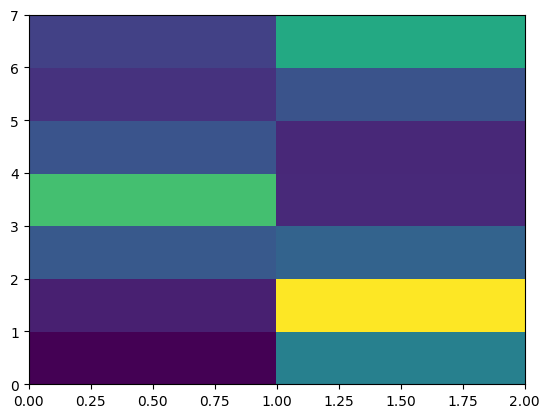

PyObject <matplotlib.collections.QuadMesh object at 0x7f9afed32fd0>

In [45]:
pcolormesh(f)

No entendí como hacer la parte de reshape ya que tenia que convertirlo a una matriz pero tenía 15 elementos así que eliminé una columna y un renglón de la matriz A y eliminé un elemento del vector b para que quedara de 14 e hice una matriz de 7x2, ahora eliminaré otros 2 renglones, columnas y elementos del vector b y haré una matriz de 4x3.

In [46]:
A=[-4 1 0 0 0 1 0 0 0 0 0 0  ; 1 -4 1 0 0 0 1 0 0 0 0 0  ; 0 1 -4 1 0 0 0 1 0 0 0 0 ; 0 0 1 -4 1 0 0 0 1 0 0 0 ; 0 0 0 1 -4 1 0 0 0 1 0 0  ; 1 0 0 0 1 -4 1 0 0 0 1 0  ; 0 1 0 0 0 1 -4 1 0 0 0 1  ; 0 0 1 0 0 0 1 -4 1 0 0 0  ; 0 0 0 1 0 0 0 1 -4 1 0 0  ; 0 0 0 0 1 0 0 0 1 -4 1 0  ; 0 0 0 0 0 1 0 0 0 1 -4 1  ; 0 0 0 0 0 0 1 0 0 0 1 -4 ]


12×12 Array{Int64,2}:
 -4   1   0   0   0   1   0   0   0   0   0   0
  1  -4   1   0   0   0   1   0   0   0   0   0
  0   1  -4   1   0   0   0   1   0   0   0   0
  0   0   1  -4   1   0   0   0   1   0   0   0
  0   0   0   1  -4   1   0   0   0   1   0   0
  1   0   0   0   1  -4   1   0   0   0   1   0
  0   1   0   0   0   1  -4   1   0   0   0   1
  0   0   1   0   0   0   1  -4   1   0   0   0
  0   0   0   1   0   0   0   1  -4   1   0   0
  0   0   0   0   1   0   0   0   1  -4   1   0
  0   0   0   0   0   1   0   0   0   1  -4   1
  0   0   0   0   0   0   1   0   0   0   1  -4

In [52]:
a=inv(A);

In [50]:
b=[0, 70.7107, 0, 0, 0, 0, 100, 0, 0, 0, 0, 70.7107];

In [51]:
F=(-a*b);

In [55]:
f=reshape(F,(4,3))

4×3 Array{Float64,2}:
 16.3011   11.1538  10.0614 
 40.0362   25.168    9.73406
 17.637    55.4962  17.721  
  9.71306  20.7987  35.982  

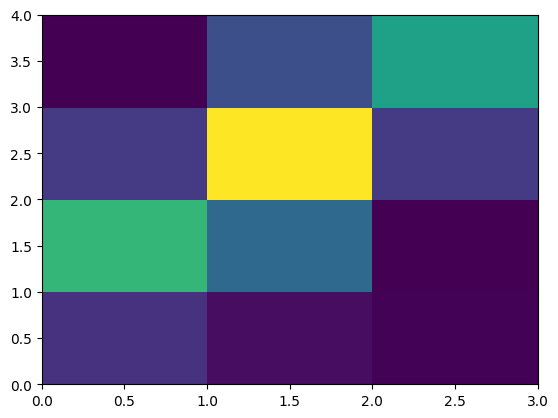

PyObject <matplotlib.collections.QuadMesh object at 0x7f9afec88890>

In [56]:
pcolormesh(f)